In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('customer.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 1].values

In [8]:
dataset.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,Healthcare,1,4
1,2,1,21,35000,81,Engineer,3,3
2,3,0,20,86000,6,Engineer,1,1
3,4,0,23,59000,77,Lawyer,0,2
4,5,0,31,38000,40,Entertainment,2,6


In [9]:
x

array([[    19,  15000],
       [    21,  35000],
       [    20,  86000],
       ...,
       [    87,  90961],
       [    77, 182109],
       [    90, 110610]])

In [11]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
x_train

array([[    40, 172378],
       [    99,  56851],
       [    81, 171194],
       ...,
       [    52, 133214],
       [     0, 151298],
       [    54, 145679]])

In [13]:
len (x_test)

500

In [14]:
len (x_train)

1500

In [15]:
len(x)

2000

In [16]:
len(y)

2000

In [17]:
len(y_test)

500

In [18]:
len(y_train)

1500

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[-0.33876529,  1.33255915],
       [ 1.74888375, -1.19257723],
       [ 1.11197388,  1.30667982],
       ...,
       [ 0.0858413 ,  0.47653033],
       [-1.75412057,  0.87180214],
       [ 0.15660906,  0.7489846 ]])

In [21]:
x_test

array([[ 0.54583176,  0.18527857],
       [ 1.67811599,  0.67324822],
       [ 1.21812552,  0.48857384],
       [-1.47104951,  0.1828961 ],
       [-1.54181727,  0.25242494],
       [-0.40953305,  1.0867055 ],
       [-0.37414917,  0.8995175 ],
       [-0.33876529,  1.32318226],
       [ 0.51044788, -1.23279511],
       [ 0.0858413 , -1.99804955],
       [-0.9049074 , -0.55285066],
       [-1.2941301 ,  1.37959658],
       [ 1.39504493, -1.01446012],
       [-0.62183634, -0.29316119],
       [-0.79875575, -0.25053898],
       [ 0.54583176, -0.8546159 ],
       [ 0.51044788,  0.99155962],
       [-1.04644293,  0.81667742],
       [-0.79875575,  0.08799064],
       [ 0.22737683, -0.53582364],
       [ 0.0858413 ,  1.15026724],
       [ 0.51044788,  0.5317862 ],
       [-1.36489786,  1.19855055],
       [-0.76337187, -0.9264835 ],
       [-0.3033814 , -0.37368438],
       [ 0.79351894,  1.41334463],
       [-1.50643339,  0.49388522],
       [ 1.46581269, -1.30444414],
       [-0.05569423,

In [22]:
, kneighbors_graph
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test, y_pred)
print(cm)

[[199  98]
 [136  67]]


<ipython-input-26-c4eee484346f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


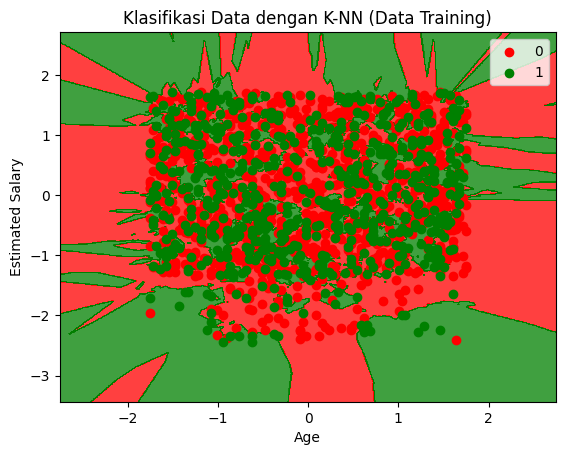

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



<ipython-input-28-069d54a3595e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


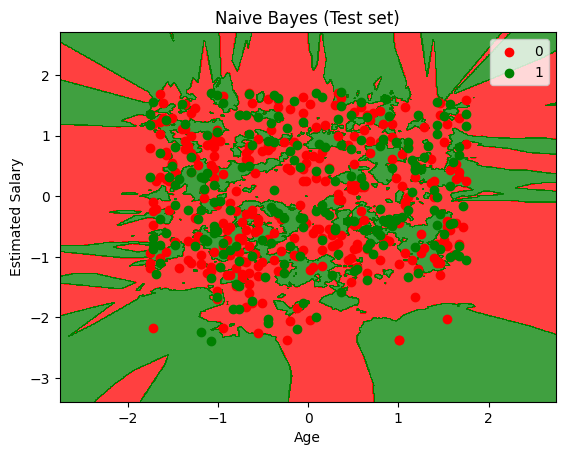

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()